In [1]:
from db_helper_functions import get_stock_news_with_finbert_scores_from_db 
from db_helper_functions import get_stock_news_with_finbert_whole_article_scores_from_db
from db_helper_functions import get_stock_news_with_finbert_tone_scores_from_db 
from db_helper_functions import get_stock_news_with_finbert_tone_whole_article_scores_from_db 
from db_helper_functions import get_stock_news_with_bertopic_sentiment_scores_from_db 

%matplotlib inline
import matplotlib.pyplot as plt
plt.ioff()

import altair as alt
import pandas as pd

In [2]:
finbert_df = get_stock_news_with_finbert_scores_from_db("AAPL")
finbert_whole_article_df = get_stock_news_with_finbert_whole_article_scores_from_db("AAPL")
finbert_tone_df = get_stock_news_with_finbert_tone_scores_from_db("AAPL")
finbert_tone_whole_article_df = get_stock_news_with_finbert_tone_whole_article_scores_from_db("AAPL") 
bertopic_df = get_stock_news_with_bertopic_sentiment_scores_from_db("AAPL") 

## Article Distribution In Each Sentiment Group

In [3]:
# Categorize articles into Positve, Negative and Neutral

def compare_sentiment_score(row):
    if row["positive"] > row["negative"] and row["positive"] > row["neutral"]:
        return "positive"
    elif row["negative"] > row["positive"] and row["negative"] > row["neutral"]:
        return "negative"
    else:
        return "neutral"

finbert_df["sentiment"] = finbert_df.apply(lambda row: compare_sentiment_score(row), axis=1)
finbert_whole_article_df["sentiment"] = finbert_whole_article_df.apply(lambda row: compare_sentiment_score(row), axis=1)
finbert_tone_df["sentiment"] = finbert_tone_df.apply(lambda row: compare_sentiment_score(row), axis=1)
finbert_tone_whole_article_df["sentiment"] = finbert_tone_whole_article_df.apply(lambda row: compare_sentiment_score(row), axis=1)
bertopic_df["sentiment"] = bertopic_df.apply(lambda row: compare_sentiment_score(row), axis=1)

In [4]:
# Function for Drawing Individual Chart
def draw_sentiment_distribution_bar_chart(df:object, subtitle:str):
    sentiments = ["negative", "neutral", "positive"]
    article_counts = []

    for sentiment in sentiments:
        count = len(df[df["sentiment"]==sentiment])
        article_counts.append(count)

    fig, ax = plt.subplots()
    bars = ax.bar(sentiments, article_counts, color='skyblue', align='center')

    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 1, yval, ha='center', va='bottom')

    ax.set_title(f"Number of Articles in each Sentiment Category\n{subtitle}")
    ax.set_xlabel('Sentiment')
    ax.set_ylabel('Number')
    
    return ax 

# Function for Drawing Charts on the axis
def draw_sentiment_distribution_bar_chart_on_axis(ax:object, df:object, subtitle:str):
    sentiments = ["negative", "neutral", "positive"]
    article_counts = []

    for sentiment in sentiments:
        count = len(df[df["sentiment"]==sentiment])
        article_counts.append(count)

    bars = ax.bar(sentiments, article_counts, color='skyblue', align='center')

    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 1, yval, ha='center', va='bottom')

    ax.set_title(f"{subtitle}")
    ax.set_xlabel('Sentiment')
    ax.set_ylabel('Number')

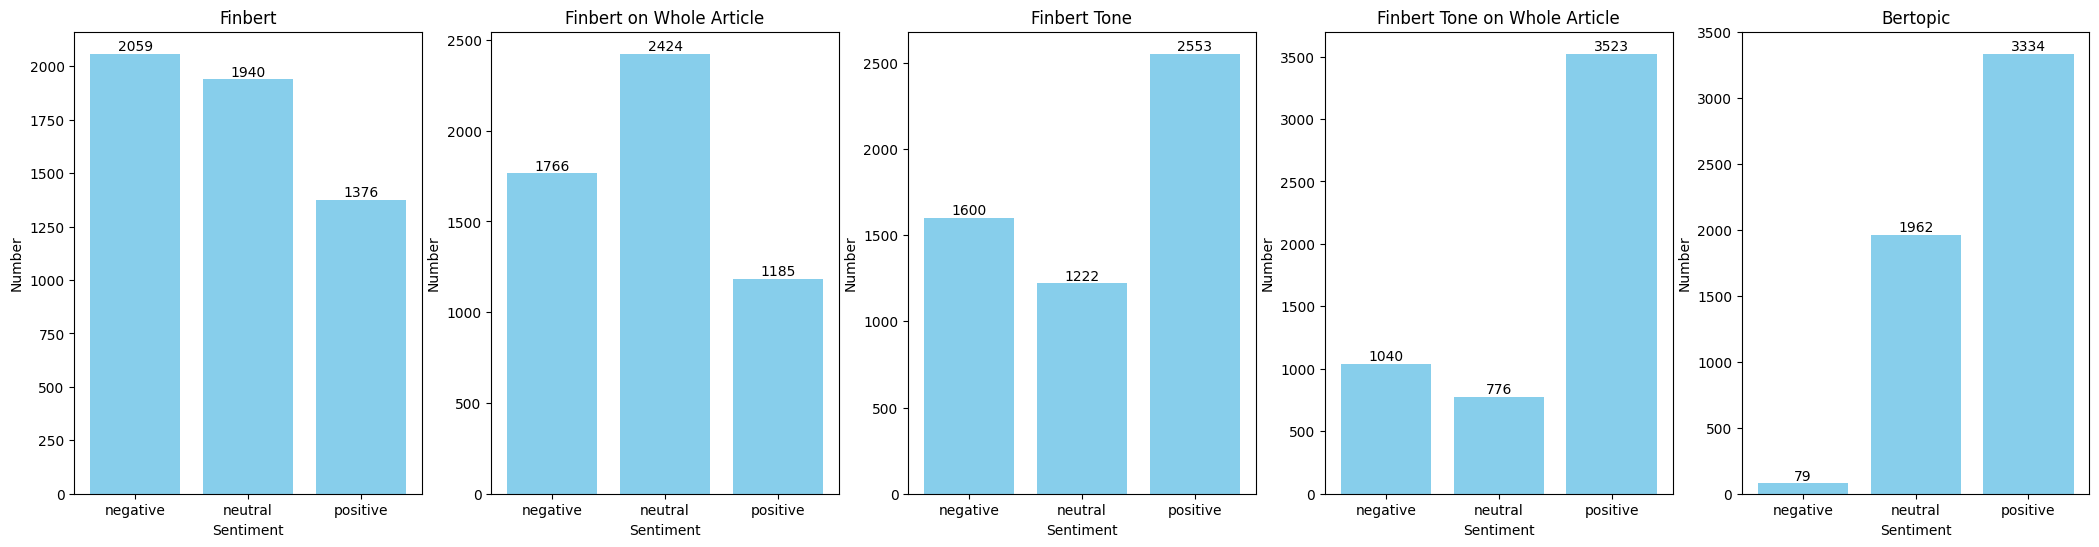

In [5]:
fig, axs = plt.subplots(1, 5, figsize=(26, 6))

draw_sentiment_distribution_bar_chart_on_axis(axs[0], finbert_df, "Finbert")
draw_sentiment_distribution_bar_chart_on_axis(axs[1], finbert_whole_article_df, "Finbert on Whole Article")
draw_sentiment_distribution_bar_chart_on_axis(axs[2], finbert_tone_df, "Finbert Tone")
draw_sentiment_distribution_bar_chart_on_axis(axs[3], finbert_tone_whole_article_df, "Finbert Tone on Whole Article")
draw_sentiment_distribution_bar_chart_on_axis(axs[4], bertopic_df, "Bertopic")

fig

## 1-D Article Sentiment Score distribution  

In [6]:
# Compute the composite sentiment score using following weight assignment
# Composite Score=(1×Positive)+(0×Neutral)+(−1×Negative)

def compute_composite_sentiment_score(row):
    score = (1 * row["positive"]) + (0 * row["neutral"]) + (-1 * row["negative"])
    
    return score

finbert_df["composite_score"] = finbert_df.apply(lambda row: compute_composite_sentiment_score(row), axis=1)
finbert_whole_article_df["composite_score"] = finbert_whole_article_df.apply(lambda row: compute_composite_sentiment_score(row), axis=1)
finbert_tone_df["composite_score"] = finbert_tone_df.apply(lambda row: compute_composite_sentiment_score(row), axis=1)
finbert_tone_whole_article_df["composite_score"] = finbert_tone_whole_article_df.apply(lambda row: compute_composite_sentiment_score(row), axis=1)
bertopic_df["composite_score"] = bertopic_df.apply(lambda row: compute_composite_sentiment_score(row), axis=1)

In [8]:
bertopic_df.sample(5)

,id,ticker,title,url,article,date,positive,negative,neutral,sentiment,composite_score
79,80,AAPL,How Google's Stadia Video Game Streamer Will B...,https://www.benzinga.com/node/13393958,"For a while, Alphabet Inc GOOGL GOOG was conte...",2019-03-20,0.390766,0.194661,0.414560,neutral,0.196105
2758,2761,AAPL,Apple Supplier Foxconn Unveils 3 EVs Including...,https://www.benzinga.com/news/21/10/23411090/a...,Key Apple Inc AAPL supplier Hon Hai Precision ...,2021-10-18,0.392309,0.208177,0.399510,neutral,0.184132
1360,1363,AAPL,OnePlus To Release Smartwatch In Early 2021,https://www.benzinga.com/news/20/12/18907890/o...,Smartphone maker OnePlus is moving into wearab...,2020-12-23,0.415895,0.182611,0.401497,positive,0.233284
2754,2757,AAPL,Disney Unveils Slate Of Original Asia-Pacific ...,https://www.benzinga.com/news/21/10/23393909/d...,Walt Disney Co DIS has unveiled a line-up of m...,2021-10-15,0.303559,0.202611,0.493818,neutral,0.100948
754,756,AAPL,TikTok Considers Launching Reality TV Show,https://www.benzinga.com/news/20/05/15930078/t...,TikTok is in discussions about creating a real...,2020-05-01,0.252605,0.399474,0.347904,negative,-0.146869


In [16]:

def drop_unnecessary_columns(df):
    df = df.drop(columns=["date","article"])
    return df

bertopic_df_processed = drop_unnecessary_columns(bertopic_df)


In [17]:
bertopic_df_processed

,id,ticker,title,url,positive,negative,neutral,sentiment,composite_score
0,1,AAPL,58 Biggest Movers From Yesterday,https://www.benzinga.com/node/12932897,0.464299,0.192475,0.343222,positive,0.271823
1,2,AAPL,Apple Lowers Revenue Expectations As China's M...,https://www.benzinga.com/node/12933509,0.543883,0.162925,0.293192,positive,0.380958
2,3,AAPL,"Market Rebounds On Trade Optimism, Tech Bounce...",https://www.benzinga.com/node/12934767,0.379343,0.235905,0.384743,neutral,0.143438
3,4,AAPL,American Shippers And Carriers React To Signs ...,https://www.benzinga.com/node/12938837,0.374402,0.243911,0.381680,neutral,0.130491
4,5,AAPL,TD Ameritrade IMX Continued Its Dip In Decembe...,https://www.benzinga.com/node/12953011,0.256786,0.369308,0.373888,neutral,-0.112522
...,...,...,...,...,...,...,...,...,...
5370,5373,AAPL,"Tesla, Amazon, Apple, Alibaba, Microsoft: Why ...",https://www.benzinga.com/news/23/01/30287594/t...,0.450044,0.187260,0.362690,positive,0.262784
5371,5374,AAPL,Microsoft Finds Apple Gatekeeper's 'Achilles' ...,https://www.benzinga.com/news/22/12/30141117/m...,0.424009,0.201395,0.374600,positive,0.222614
5372,5375,AAPL,"Facebook, Amazon, Apple, Google Stamping Out R...",https://www.benzinga.com/government/20/10/1781...,0.318888,0.303523,0.377590,neutral,0.015365
5373,5376,AAPL,Apple's New Patents Indicate Macs Will Be Able...,https://www.benzinga.com/news/21/01/19032246/a...,0.379527,0.216145,0.404337,neutral,0.163382


In [20]:
bertopic_df_processed[bertopic_df_processed["sentiment"]=="negative"]

,id,ticker,title,url,positive,negative,neutral,sentiment,composite_score
425,426,AAPL,Ukraine Blasts Apple For 'Not Giving A Damn' A...,https://www.benzinga.com/node/14901831,0.255577,0.496157,0.248286,negative,-0.240580
591,593,AAPL,Calendar Apps Can Do Wonders And Not Only For ...,https://www.benzinga.com/node/15364635,0.334907,0.388946,0.276148,negative,-0.054039
648,650,AAPL,Energy Sector Under New Pressure From Plunging...,https://www.benzinga.com/node/15507508,0.328792,0.355726,0.315462,negative,-0.026934
754,756,AAPL,TikTok Considers Launching Reality TV Show,https://www.benzinga.com/news/20/05/15930078/t...,0.252605,0.399474,0.347904,negative,-0.146869
906,908,AAPL,"Spotify Expands To 13 European Markets, Includ...",https://www.benzinga.com/news/20/07/16662219/s...,0.268735,0.448569,0.282691,negative,-0.179834
...,...,...,...,...,...,...,...,...,...
5036,5039,AAPL,Disguised Russian Software Made Its Way Into A...,https://www.benzinga.com/government/22/11/2970...,0.322065,0.356131,0.321812,negative,-0.034066
5050,5053,AAPL,US Stocks Hold On To Optimism Even As Putin's ...,https://www.benzinga.com/news/earnings/22/11/2...,0.182310,0.419744,0.397935,negative,-0.237434
5097,5100,AAPL,Russian Crude Oil Price Cap And Price Mechanism,https://www.benzinga.com/markets/cryptocurrenc...,0.358531,0.487365,0.154103,negative,-0.128834
5148,5151,AAPL,"China Bounces Up, Volumes Super Low",https://www.benzinga.com/markets/asia/22/11/29...,0.307088,0.354991,0.337942,negative,-0.047903


In [18]:
# alt.data_transformers.disable_max_rows()
# chart = alt.Chart(finbert_df_processed).mark_circle(size=80).encode(
#     x=alt.X('composite_score', scale=alt.Scale(domain=[-1, 1]), title='Composite Score'),
#     color='sentiment',
#     tooltip=['title']
# ).properties(
#     width=1500,
#     height=150
# ).interactive()

# chart

In [31]:
# Function to Draw 1-D Scatter plot

def draw_1d_scatter_plot(df:object, sample_size:int, title:str):
    # Preprocess the DataFrame
    sampled_df = df.sample(sample_size)
    sampled_df = sampled_df.drop(columns=["date","article"])

    # Find the index of the most negative, neutral and positive nodes
    max_negative_row = sampled_df.loc[sampled_df['composite_score'].idxmin()].to_frame().T
    max_neutral_row = sampled_df.loc[sampled_df['neutral'].idxmax()].to_frame().T
    max_positive_row = sampled_df.loc[sampled_df['composite_score'].idxmax()].to_frame().T

    # Concatenate these rows into a new DataFrame
    target_articles_df = pd.concat([max_negative_row, max_neutral_row, max_positive_row])

    scatter = alt.Chart(sampled_df).mark_circle(size=150).encode(
        x=alt.X('composite_score', scale=alt.Scale(domain=[-1, 1]), title='Composite Score'),
        color='sentiment',
        tooltip=['title']
    ).properties(
        width=1200,
        height=200,
        title=title
    ).interactive()

    negative_text_marks = alt.Chart(max_negative_row).mark_text(align='right', dx=0, dy=30, fontSize=12, fontWeight='bold').encode(
        x='composite_score',
        text='title'
    )
    
    neutral_text_marks = alt.Chart(max_neutral_row).mark_text(align='left', dx=0, dy=30, fontSize=12, fontWeight='bold').encode(
        x='composite_score',
        text='title'
    )

    positive_text_marks = alt.Chart(max_positive_row).mark_text(align='right', dx=0, dy=-30, fontSize=12, fontWeight='bold').encode(
        x='composite_score',
        text='title'
    )

    text_arrow_below = alt.Chart(target_articles_df[:2]).mark_text(text='\u2191', align='left', dx=-4, dy=15, fontSize=18, fontWeight='bold').encode(
        x='composite_score',
    )

    text_arrow_above = alt.Chart(target_articles_df[2:]).mark_text(text='\u2191', align='left', dx=-4, dy=-15, fontSize=18, fontWeight='bold').encode(
        x='composite_score',
    )

    chart = scatter + text_arrow_below + text_arrow_above + negative_text_marks + neutral_text_marks + positive_text_marks

    return chart

In [56]:
draw_1d_scatter_plot(bertopic_df, 100, "Sample articles sentiment score with Bertopic + Finbert")

c:\Users\Steven\AppData\Local\Programs\Python\Python39\lib\site-packages\altair\utils\core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
c:\Users\Steven\AppData\Local\Programs\Python\Python39\lib\site-packages\altair\utils\core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
c:\Users\Steven\AppData\Local\Programs\Python\Python39\lib\site-packages\altair\utils\core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if

alt.LayerChart(...)

## Model Score Comparsion

In [120]:
def get_score(row, df):
    score = df[df["id"]==row["id"]]["composite_score"].values[0]
    return score


# Randomlly Sample Articles
samples = finbert_df.sample(6)
sampled_df = samples[["id","title"]].copy()

sampled_df["finbert_score"] = sampled_df.apply(lambda row: get_score(row, finbert_df), axis=1)
sampled_df["finbert_whole_article_score"] = sampled_df.apply(lambda row: get_score(row, finbert_whole_article_df), axis=1)
sampled_df["finbert_tone_score"] = sampled_df.apply(lambda row: get_score(row, finbert_tone_df), axis=1)
sampled_df["finbert_tone_whole_article_score"] = sampled_df.apply(lambda row: get_score(row, finbert_tone_whole_article_df), axis=1)
sampled_df["bertopic_score"] = sampled_df.apply(lambda row: get_score(row, bertopic_df), axis=1)


sampled_df


,id,title,finbert_score,finbert_whole_article_score,finbert_tone_score,finbert_tone_whole_article_score,bertopic_score
4086,2772,This Halloween Costume Store Has A Better One-...,0.5820,0.5235,-0.9474,-0.1412,0.375367
2313,4574,"Apple Spent Billions To Get Soccer, But You Ca...",-0.6636,-0.1997,0.0175,0.7264,0.139736
2700,178,Huawei Acknowledges Potential $30B Revenue Sho...,-0.5807,-0.1123,0.9279,0.3148,0.226968
5158,4892,Tim Cook Says Lag In iPhone Sales Due To Suppl...,0.9212,0.2440,-1.0000,-0.6637,0.078249
2009,3802,Morning Brief: Top Financial Stories Dominatin...,-0.5886,-0.3303,0.9980,0.7659,-0.013956
2638,191,"Jony Ive To Leave Apple, Start Own Creative Bu...",0.0862,-0.2875,0.9998,0.7965,0.265610


In [127]:
row_df = sampled_df.iloc[1].to_frame().T

def draw_model_comparsion_bar_chart(row_df):
    row_df = pd.melt(row_df, id_vars=["id","title"])
    row_df = row_df.rename(columns={
        "variable":"model_name",
        "value":"composite_sentiment_score"
    })

    display_order = ["finbert_score", "finbert_whole_article_score", "finbert_tone_score", "finbert_tone_whole_article_score", "bertopic_score"]

    chart = alt.Chart(row_df).mark_bar().encode(
        x=alt.X('model_name', sort=display_order, axis=alt.Axis(labelAngle=-45, labelFontSize=12)),
        y='composite_sentiment_score'
    ).properties(
        width=400,
        height=300,
        title=row_df.iloc[0]["title"]
    )

    return chart


In [128]:
charts = []

for i in range(len(sampled_df)):
    row_df = sampled_df.iloc[i].to_frame().T
    chart = draw_model_comparsion_bar_chart(row_df)
    charts.append(chart)

concatenated_chart = alt.vconcat(*charts)
concatenated_chart

alt.VConcatChart(...)

## Unsupervised Learning Sensitivity Analysis

In [3]:
# Load the results from the csv
sensitivity_analysis_df = pd.read_csv("sensitivity_analysis.csv")

sensitivity_analysis_df

,number_of_topic,mean_positive_score,mean_negative_score,mean_neutral_score
0,5.0,0.428850,0.207813,0.343839
1,10.0,0.326305,0.354997,0.313521
2,15.0,0.322436,0.267431,0.407721
3,20.0,0.296213,0.252224,0.449462
4,25.0,0.369929,0.246248,0.383383
5,30.0,0.303982,0.279972,0.415943
6,35.0,0.287385,0.272889,0.439622
7,40.0,0.290875,0.303256,0.405768


In [4]:
sensitivity_analysis_df_long = pd.melt(sensitivity_analysis_df, id_vars="number_of_topic")
sensitivity_analysis_df_long

,number_of_topic,variable,value
0,5.0,mean_positive_score,0.428850
1,10.0,mean_positive_score,0.326305
2,15.0,mean_positive_score,0.322436
3,20.0,mean_positive_score,0.296213
4,25.0,mean_positive_score,0.369929
5,30.0,mean_positive_score,0.303982
6,35.0,mean_positive_score,0.287385
7,40.0,mean_positive_score,0.290875
8,5.0,mean_negative_score,0.207813
9,10.0,mean_negative_score,0.354997


In [15]:
def draw_mean_score_bar_chart(df, title):

    display_order = ["mean_negative_score", "mean_neutral_score", "mean_positive_score"]

    chart = alt.Chart(df).mark_bar().encode(
        x=alt.X('variable', sort=display_order, axis=alt.Axis(labelAngle=-45, labelFontSize=16, title=None)),
        y=alt.Y('value', axis=alt.Axis(labelFontSize=16, title=None))
    ).properties(
        width=300,
        height=400,
        title={
            "text": title, 
            "fontSize": 20, 
        }
    )

    return chart

In [16]:
topic_num_arr = sensitivity_analysis_df_long["number_of_topic"].unique()

charts_top = []
charts_buttom = []

for i in range(4):
    df = sensitivity_analysis_df_long[sensitivity_analysis_df_long["number_of_topic"] == topic_num_arr[i]]
    title = f"Number of Topics: {int(topic_num_arr[i])}"
    chart = draw_mean_score_bar_chart(df, title)
    charts_top.append(chart)

for i in range(4,len(topic_num_arr)):
    df = sensitivity_analysis_df_long[sensitivity_analysis_df_long["number_of_topic"] == topic_num_arr[i]]
    title = f"Number of Topics: {int(topic_num_arr[i])}"
    chart = draw_mean_score_bar_chart(df, title)
    charts_buttom.append(chart)



concatenated_chart_top = alt.hconcat(*charts_top)
concatenated_chart_buttom = alt.hconcat(*charts_buttom)

concatenated_chart = alt.vconcat(concatenated_chart_top,concatenated_chart_buttom)

# concatenated_chart = concatenated_chart.properties(
#     title=alt.TitleParams(
#         text='Sensitivity Analysis on Number of Topics with BerTopic + Finbert'  ,
#         align='left',
#         fontSize=20
#     )
# )
concatenated_chart

c:\Users\Steven\AppData\Local\Programs\Python\Python39\lib\site-packages\altair\utils\core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
c:\Users\Steven\AppData\Local\Programs\Python\Python39\lib\site-packages\altair\utils\core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
c:\Users\Steven\AppData\Local\Programs\Python\Python39\lib\site-packages\altair\utils\core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if

alt.VConcatChart(...)